## Project Name : Pet Adoption Status Prediction  Using ANN

### Contribution : Individual

## Data Dictionary


| Column Name         | Description                                           |
|---------------------|-------------------------------------------------------|
| PetID                 | Unique identifier for each pet |
| PetType      | Type of pet (e.g., Dog, Cat, Bird, Rabbit)                      |
|Breed                  | Specific breed of the pet            |
| AgeMonths          |  Age of the pet in months   |
|Color          |  Color of the pet          |
|Size        | Size category of the pet (Small, Medium, Large)|
| WeightKg    |  Weight of the pet in kilograms   |
| Vaccinated     | Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated)       |
| HealthCondition    |  Health condition of the pet (0 - Healthy, 1 - Medical condition)| Cabin     | The cabin number asshe passenger, if available       |
| TimeInShelterDays     |Duration the pet has been in the shelter (days)       |
|AdoptionFee   | Adoption fee charged for the pet (in dollars)  |
|PreviousOwner    | Whether the pet had a previous owner (0 - No, 1 - Yes)
|AdoptionLikelihood |  Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely)



In [1]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
sns.set(style='dark', palette='bright')
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# load dataset
dataset = '/content/drive/MyDrive/pet_adoption_data.csv'

df = pd.read_csv(dataset)
df.head()

PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

## Data Preprocessing Part 1

In [4]:
# checking shape of dataset
df.shape

(2007, 13)

In [5]:
# checking info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [6]:
# descriptive statistics
df.describe()

PetID    AgeMonths     WeightKg   Vaccinated  HealthCondition  \
count  2007.000000  2007.000000  2007.000000  2007.000000      2007.000000   
mean   1503.000000    92.279522    15.705776     0.701046         0.196313   
std     579.515315    52.148363     8.327749     0.457914         0.397307   
min     500.000000     1.000000     1.018198     0.000000         0.000000   
25%    1001.500000    48.000000     8.730396     0.000000         0.000000   
50%    1503.000000    94.000000    15.925416     1.000000         0.000000   
75%    2004.500000   138.000000    22.737180     1.000000         0.000000   
max    2506.000000   179.000000    29.995628     1.000000         1.000000   

       TimeInShelterDays  AdoptionFee  PreviousOwner  AdoptionLikelihood  
count        2007.000000  2007.000000    2007.000000         2007.000000  
mean           43.974091   249.142003       0.301943            0.328351  
std            25.740253   142.887040       0.459215            0.469730  
min             1.000000     0.000000       0.000000            0.000000  
25%            21.000000   127.000000       0.000000            0.000000  
50%            45.000000   242.000000       0.000000            0.000000  
75%            66.000000   375.000000       1.000000            1.000000  
max            89.000000   499.000000       1.000000            1.000000

In [7]:
# descriptive statistics (object)
df.describe(include='object')

PetType   Breed  Color    Size
count     2007    2007   2007    2007
unique       4       7      5       3
top        Dog  Rabbit  White  Medium
freq       522     493    420     714

In [8]:
# drop id column
df.drop('PetID', axis=1, inplace=True)

In [9]:
# checking column again
df.shape[1]

12

In [10]:
# check nunique all column
df.nunique().sort_values()

Vaccinated               2
HealthCondition          2
PreviousOwner            2
AdoptionLikelihood       2
Size                     3
PetType                  4
Color                    5
Breed                    7
TimeInShelterDays       89
AgeMonths              179
AdoptionFee            493
WeightKg              2007
dtype: int64

## Eksploratory Data Analysis (EDA)

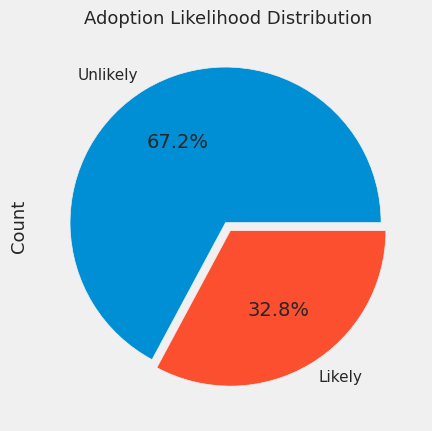

In [11]:
# target var distribution
df['AdoptionLikelihood'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.03, 0.03], labels=['Unlikely', 'Likely'])
plt.title('Adoption Likelihood Distribution', size=13)
plt.ylabel('Count', size=13)
plt.show()

Based on the pie plot above, it can be concluded that most people (67.2%) do not like adopting animals. This can be caused by various factors, such as animal health, age, breed and others. On the other hand, there are around 32.8% of people who like to adopt animals. This shows that there are still some people who care about animal welfare and are willing to provide a proper home for them.

<Figure size 1000x500 with 0 Axes>

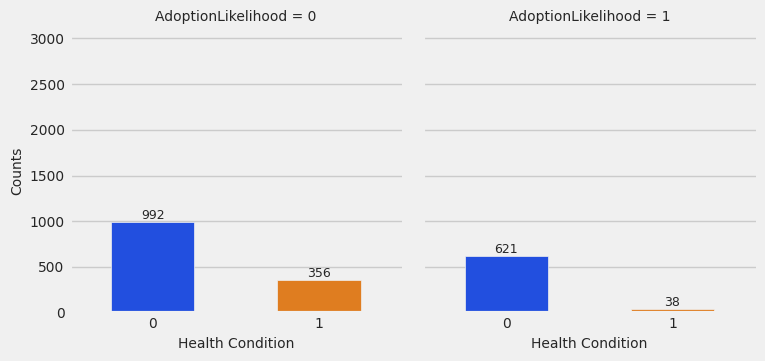

In [12]:
# AdoptionLikeHood by Health Condition
plt.figure(figsize=(10, 5))

g = sns.catplot(
    data=df,
    x='HealthCondition',
    col='AdoptionLikelihood',
    col_wrap=2,
    kind='count',
    height=4,
    aspect=1,
    width=0.5,
    palette='bright'
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge', fontsize=9)
        ax.set_xlabel('Health Condition', fontsize=10)
        ax.set_ylabel('Counts', fontsize=10)
        ax.set_ylim(0, 3100)
        ax.tick_params(axis='both', labelsize=10)
        g.set_titles(size=10)

plt.show()

nb

1 : Medical Condition

0 : Healthy

Based on the plot above, it can be concluded that pets with health conditions are less likely to be adopted compared to healthy pets. This is understandable as people may be concerned about the cost and time commitment involved in caring for a pet with health problems. Additionally, some people may be hesitant to adopt a pet with health conditions due to concerns about the pet's quality of life.

<Figure size 1000x500 with 0 Axes>

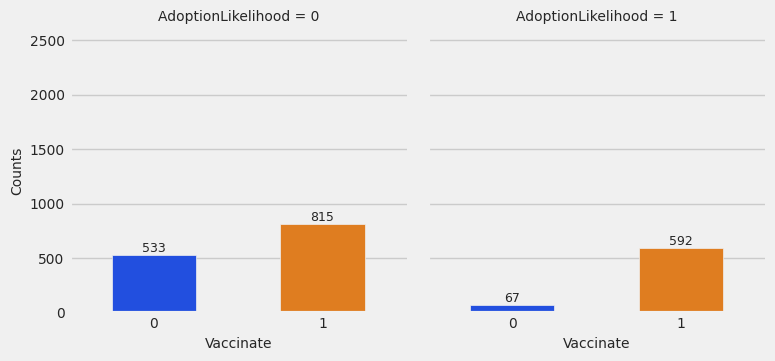

In [13]:
# AdoptionLikeHood by Vaccinated
plt.figure(figsize=(10, 5))

g = sns.catplot(
    data=df,
    x='Vaccinated',
    col='AdoptionLikelihood',
    col_wrap=2,
    kind='count',
    height=4,
    aspect=1,
    width=0.5,
    palette='bright'
)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge', fontsize=9)
        ax.set_xlabel('Vaccinate', fontsize=10)
        ax.set_ylabel('Counts', fontsize=10)
        ax.set_ylim(0, 2600)
        ax.tick_params(axis='both', labelsize=10)
        g.set_titles(size=10)

plt.show()

nb

0 : Not Vaccinated

1 : Vaccinated

Based on the plot above, it can be concluded that pets that are vaccinated are more likely to be adopted compared to pets that are not vaccinated. This is likely because people perceive vaccinated pets as being healthier and less likely to carry diseases. Additionally, some people may be required to adopt a vaccinated pet by their local government or housing association.

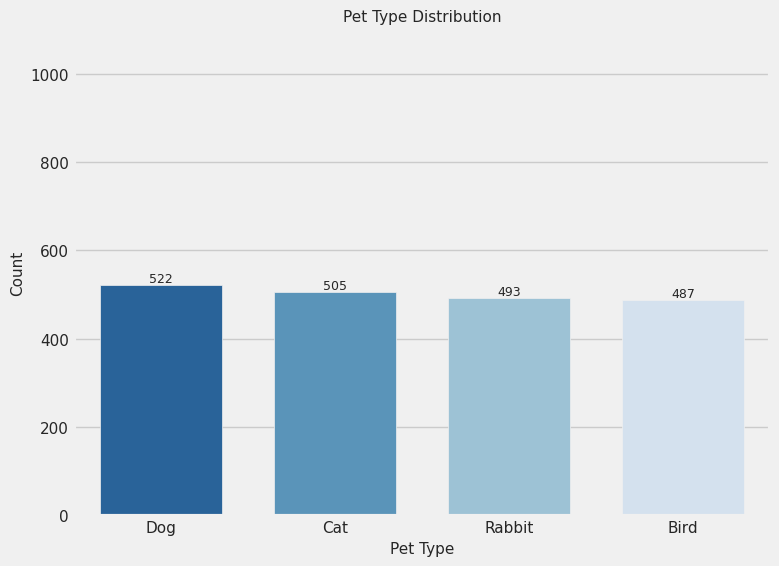

In [14]:
# PetType Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='PetType', palette='Blues_r', order=df['PetType'].value_counts().index, width=0.7)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)
plt.title('Pet Type Distribution', size=11)
plt.xlabel('Pet Type', size=11)
plt.ylabel('Count', size=11)
plt.ylim(0, 1100)
plt.show()

Based on the bar plot above, it can be concluded that dogs are the most popular type of pet for adoption, followed by cats and rabbits. This is likely because dogs and cats are generally considered to be more affectionate and playful than other types of pets, such as birds or reptiles. Additionally, dogs and cats are often seen as being more trainable and easier to care for than other types of pets.


<Figure size 1000x500 with 0 Axes>

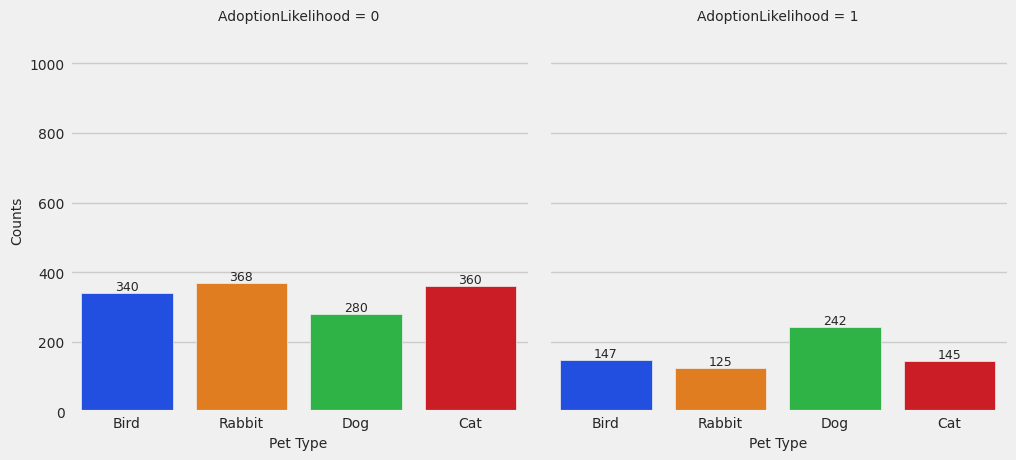

In [15]:
# AdoptionLikeHood by PetType
plt.figure(figsize=(10, 5))

gs = sns.catplot(
    data=df,
    x='PetType',
    kind='count',
    col='AdoptionLikelihood',
    height=5,
    col_wrap=4,
    aspect=1,
    palette = 'bright',
)
for ax in gs.axes.ravel():
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=9)
        ax.set_xlabel('Pet Type', fontsize=10)
        ax.set_ylabel('Counts', fontsize=10)
        ax.set_ylim(0, 1100)
        ax.tick_params(axis='both', labelsize=10)
        gs.set_titles(size=10)


plt.show()

Based on the plot above, it can be concluded that:

1. Dogs are the most popular type of pet for adoption, followed by cats and bird.
2. Rabbits are the least popular animal to adoption, followed by cats

These insights can be used by animal shelters to increase their adoption rates. For example, a shelter may focus on promoting rabbits and cats for adoption. Additionally, shelters can provide more information about their pets' health conditions so potential adopters can make informed decisions.

In [16]:
# categorize by type of animal
dog_df = df[df['PetType'] == 'Dog']
cat_df = df[df['PetType'] == 'Cat']
bird_df = df[df['PetType'] == 'Bird']
rabbit_df = df[df['PetType'] == 'Rabbit']

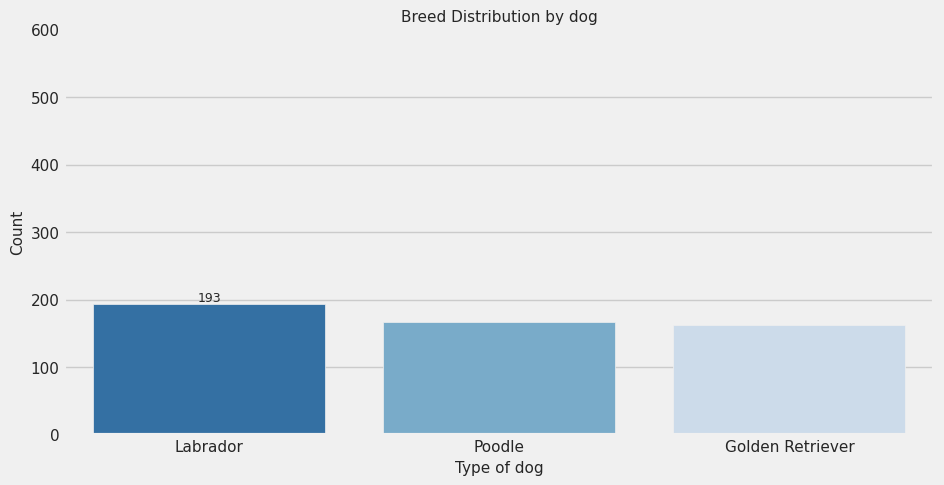

In [17]:
# Dog distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=dog_df, x='Breed', palette='Blues_r', order=dog_df['Breed'].value_counts().index)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=9)
plt.title('Breed Distribution by dog', size=11)
plt.xlabel('Type of dog', size=11)
plt.ylabel('Count', size=11)
plt.ylim(0, 600)
plt.show()

Labrador is the most popular breed of dog for adoption, followed by Poodle and Golden Retriever. These insights can be used by animal shelters to increase their adoption rates.

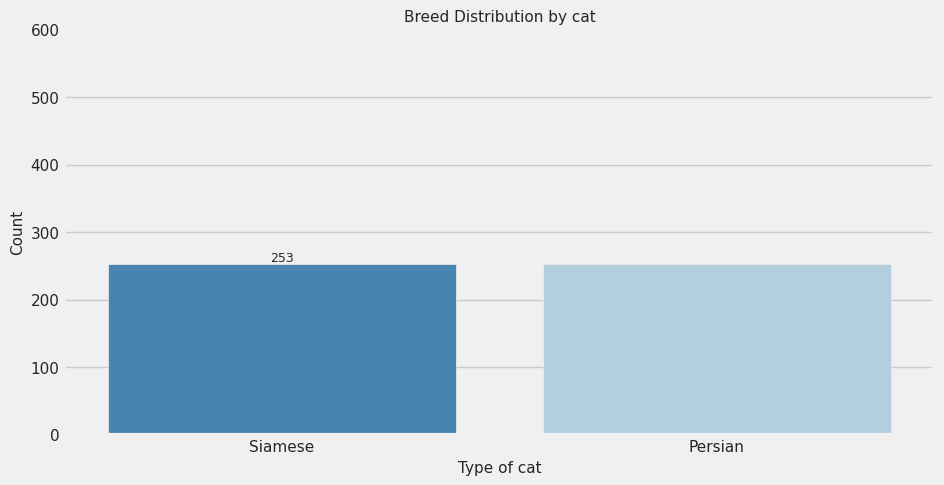

In [18]:
# cat distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=cat_df, x='Breed', palette='Blues_r', order=cat_df['Breed'].value_counts().index)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=9)
plt.title('Breed Distribution by cat', size=11)
plt.xlabel('Type of cat', size=11)
plt.ylabel('Count', size=11)
plt.ylim(0, 600)
plt.show()

Based on the plot above, it can be seen that the Siamese and Persian cat types do not have much difference in adoption popularity, this is proven because there is only a difference of one number, led by the Siamase.

In [19]:
# concat bird and rabbit
merged_df = pd.concat([bird_df, rabbit_df], axis=0)
bird_rabbit_df = merged_df['Breed']
bird_rabbit_df.unique()

array(['Parakeet', 'Rabbit'], dtype=object)

Because there is only one type of rabbit and bird, I will make it into one plot

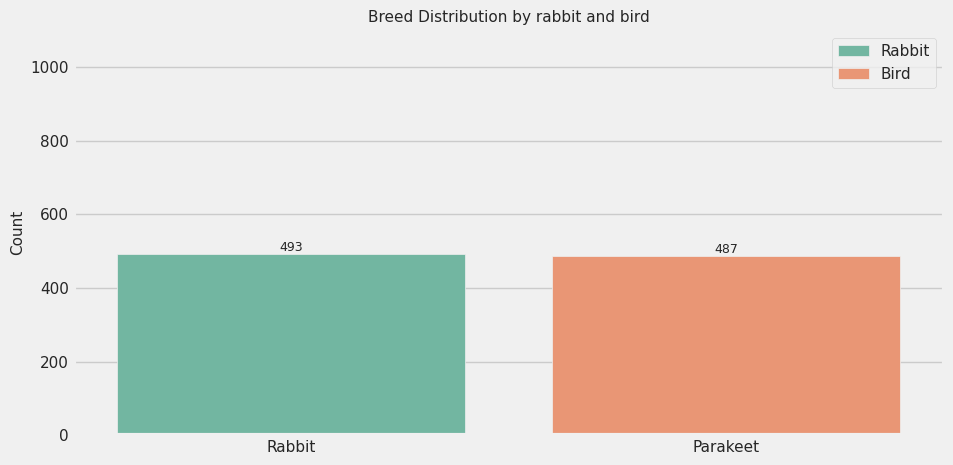

In [20]:
# rabbit distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=merged_df, x='Breed', palette='Set2', order=merged_df['Breed'].value_counts().index)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=9)
ax.bar_label(ax.containers[1], label_type='edge', fontsize=9)
plt.title('Breed Distribution by rabbit and bird', size=11)
plt.xlabel('', size=11)
plt.ylabel('Count', size=11)
plt.ylim(0, 1100)
plt.legend(['Rabbit', 'Bird'])
plt.show()

From the plot above, rabbits are the most popular animal to adopt, followed by parakeets. These insights can be used by animal shelters to increase their adoption rates.

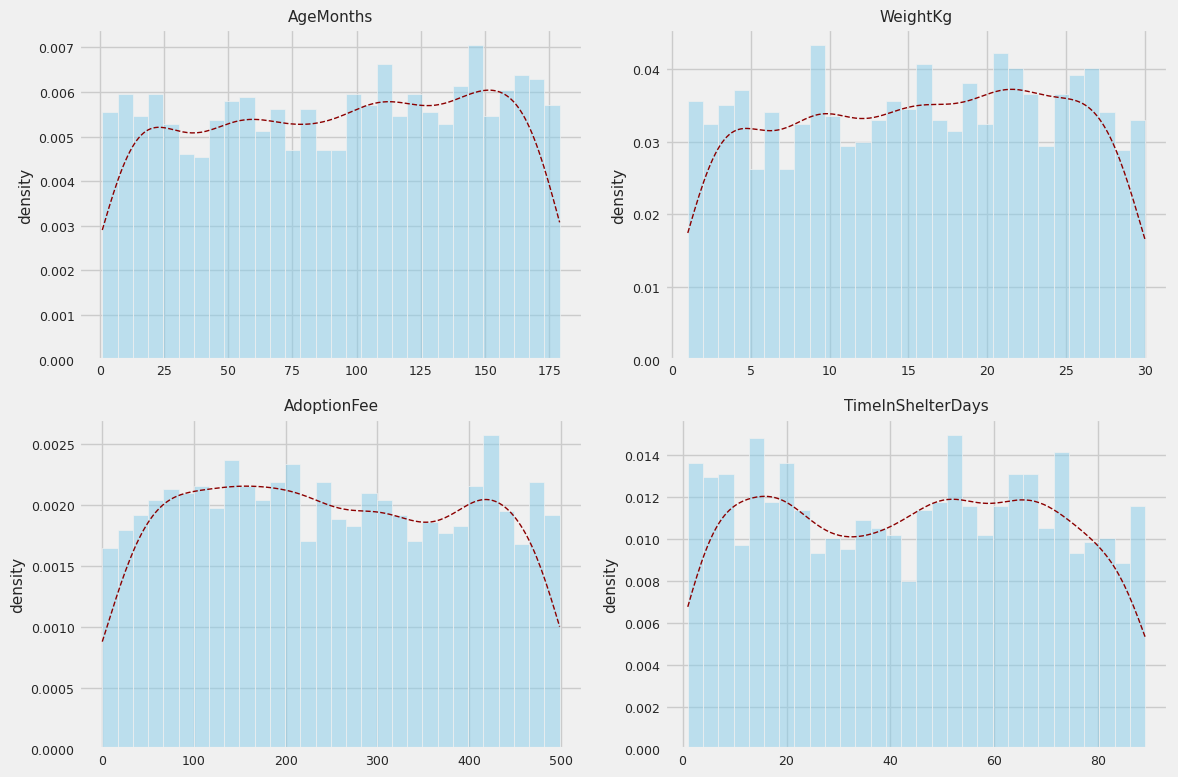

In [21]:
df_num = ['AgeMonths', 'WeightKg', 'AdoptionFee', 'TimeInShelterDays']

plt.figure(figsize=(12, 8))
for i in range(0, len(df_num)):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df[df_num[i]], kde=True, color='skyblue', stat='density', bins=30, line_kws={'lw': 1, 'linestyle': 'dashed'},
).lines[0].set_color('darkred')
    plt.tick_params(axis='both', labelsize=9)
    plt.title(df_num[i], fontsize=11)
    plt.xlabel('', fontsize=11)
    plt.ylabel('density', fontsize=11)
    plt.tight_layout()

- The distribution of 'AgeMonths' shows that most of the pets are young, with a peak around 3-4 months. This could be due to the fact that younger pets are often more playful and energetic, which may make them more appealing to potential adopters.

- The distribution of 'WeightKg' shows that most of the pets are small to medium-sized, with a peak around 5-10 kilograms. This could be due to the fact that smaller pets are often easier to care for and may be more suitable for people living in apartments or other small spaces.

- The distribution of 'AdoptionFee' shows that most of the pets have an adoption fee of less than $200. This could be due to the fact that animal shelters often charge lower adoption fees for pets that are less desirable, such as older pets or pets with health problems.

- The distribution of 'TimeInShelterDays' shows that most of the pets have been in the shelter for less than 30 days. This could be due to the fact that pets that are adopted quickly are often those that are healthy, friendly, and have desirable traits.

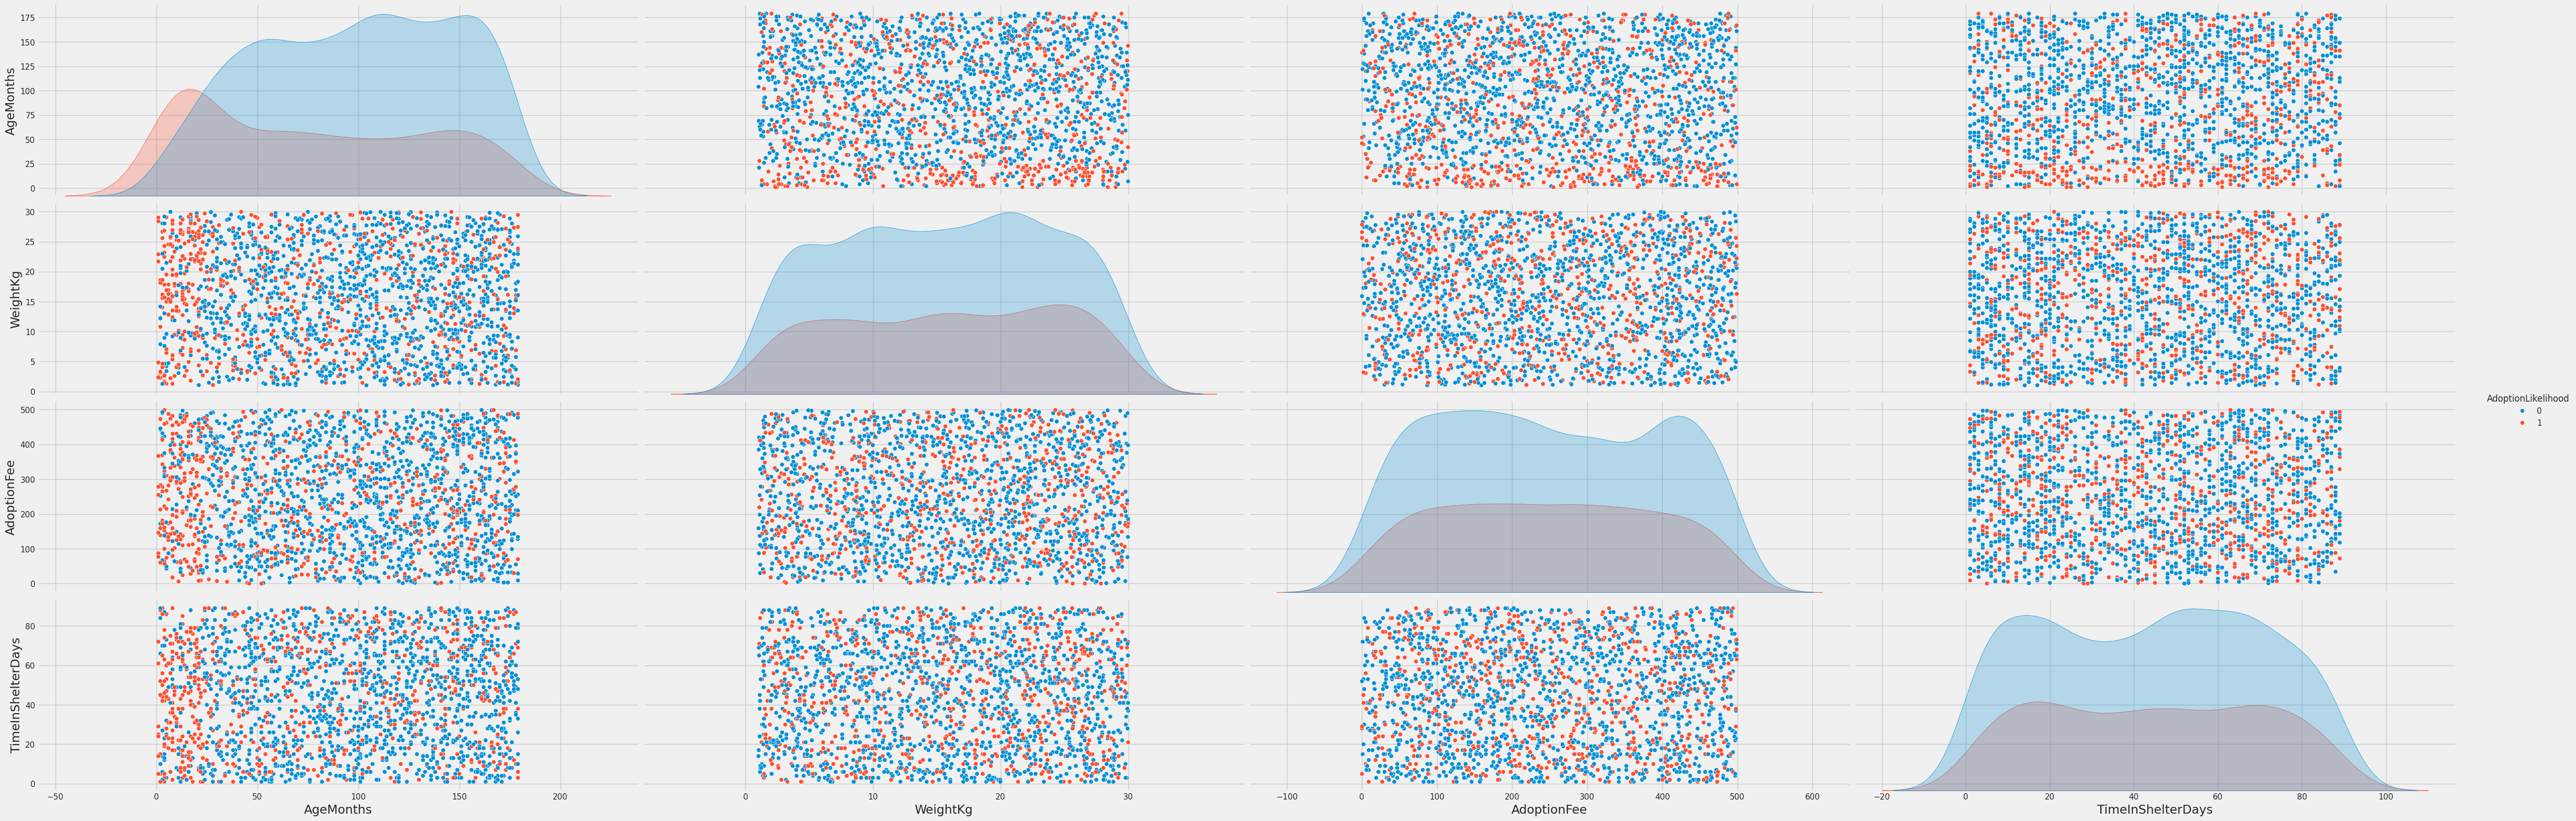

In [22]:
pair_df_num = ['AgeMonths', 'WeightKg', 'AdoptionFee', 'TimeInShelterDays']
pair_df_num.append('AdoptionLikelihood')

sns.pairplot(df[pair_df_num], hue='AdoptionLikelihood', kind='scatter', height=4, aspect=3)
plt.show()

## Data Preprocessing Part 2

In [23]:
df.head()

PetType             Breed  AgeMonths   Color    Size   WeightKg  Vaccinated  \
0    Bird          Parakeet        131  Orange   Large   5.039768           1   
1  Rabbit            Rabbit         73   White   Large  16.086727           0   
2     Dog  Golden Retriever        136  Orange  Medium   2.076286           0   
3    Bird          Parakeet         97   White   Small   3.339423           0   
4  Rabbit            Rabbit        123    Gray   Large  20.498100           0   

   HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0                0                 27          140              0   
1                0                  8          235              0   
2                0                 85          385              0   
3                0                 61          217              1   
4                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [24]:
# One-Hot Encoding for col 'PetType', 'Breed', 'Color'
one_hot_cols = ['PetType', 'Breed', 'Color']

ohe = OneHotEncoder(sparse=False)
df_ohe = ohe.fit_transform(df[one_hot_cols])
df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out(one_hot_cols))
df_ohe.head()

PetType_Bird  PetType_Cat  PetType_Dog  PetType_Rabbit  \
0           1.0          0.0          0.0             0.0   
1           0.0          0.0          0.0             1.0   
2           0.0          0.0          1.0             0.0   
3           1.0          0.0          0.0             0.0   
4           0.0          0.0          0.0             1.0   

   Breed_Golden Retriever  Breed_Labrador  Breed_Parakeet  Breed_Persian  \
0                     0.0             0.0             1.0            0.0   
1                     0.0             0.0             0.0            0.0   
2                     1.0             0.0             0.0            0.0   
3                     0.0             0.0             1.0            0.0   
4                     0.0             0.0             0.0            0.0   

   Breed_Poodle  Breed_Rabbit  Breed_Siamese  Color_Black  Color_Brown  \
0           0.0           0.0            0.0          0.0          0.0   
1           0.0           1.0            0.0          0.0          0.0   
2           0.0           0.0            0.0          0.0          0.0   
3           0.0           0.0            0.0          0.0          0.0   
4           0.0           1.0            0.0          0.0          0.0   

   Color_Gray  Color_Orange  Color_White  
0         0.0           1.0          0.0  
1         0.0           0.0          1.0  
2         0.0           1.0          0.0  
3         0.0           0.0          1.0  
4         1.0           0.0          0.0

In [25]:
# do concat for df and result from ohe
df = pd.concat([df, df_ohe], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PetType                 2007 non-null   object 
 1   Breed                   2007 non-null   object 
 2   AgeMonths               2007 non-null   int64  
 3   Color                   2007 non-null   object 
 4   Size                    2007 non-null   object 
 5   WeightKg                2007 non-null   float64
 6   Vaccinated              2007 non-null   int64  
 7   HealthCondition         2007 non-null   int64  
 8   TimeInShelterDays       2007 non-null   int64  
 9   AdoptionFee             2007 non-null   int64  
 10  PreviousOwner           2007 non-null   int64  
 11  AdoptionLikelihood      2007 non-null   int64  
 12  PetType_Bird            2007 non-null   float64
 13  PetType_Cat             2007 non-null   float64
 14  PetType_Dog             2007 non-null   

In [26]:
# Label Encoding for 'size' column
label_encoder = LabelEncoder()
df['Size'] = label_encoder.fit_transform(df['Size'])
df.head()

PetType             Breed  AgeMonths   Color  Size   WeightKg  Vaccinated  \
0    Bird          Parakeet        131  Orange     0   5.039768           1   
1  Rabbit            Rabbit         73   White     0  16.086727           0   
2     Dog  Golden Retriever        136  Orange     1   2.076286           0   
3    Bird          Parakeet         97   White     2   3.339423           0   
4  Rabbit            Rabbit        123    Gray     0  20.498100           0   

   HealthCondition  TimeInShelterDays  AdoptionFee  ...  Breed_Parakeet  \
0                0                 27          140  ...             1.0   
1                0                  8          235  ...             0.0   
2                0                 85          385  ...             0.0   
3                0                 61          217  ...             1.0   
4                0                 28           14  ...             0.0   

   Breed_Persian  Breed_Poodle  Breed_Rabbit  Breed_Siamese  Color_Black  \
0            0.0           0.0           0.0            0.0          0.0   
1            0.0           0.0           1.0            0.0          0.0   
2            0.0           0.0           0.0            0.0          0.0   
3            0.0           0.0           0.0            0.0          0.0   
4            0.0           0.0           1.0            0.0          0.0   

   Color_Brown  Color_Gray  Color_Orange  Color_White  
0          0.0         0.0           1.0          0.0  
1          0.0         0.0           0.0          1.0  
2          0.0         0.0           1.0          0.0  
3          0.0         0.0           0.0          1.0  
4          0.0         1.0           0.0          0.0  

[5 rows x 28 columns]

In [27]:
# drop 'PetType', 'Breed', 'Color' columns
drop_col = ['PetType', 'Breed', 'Color']
df.drop(drop_col, axis=1, inplace=True)

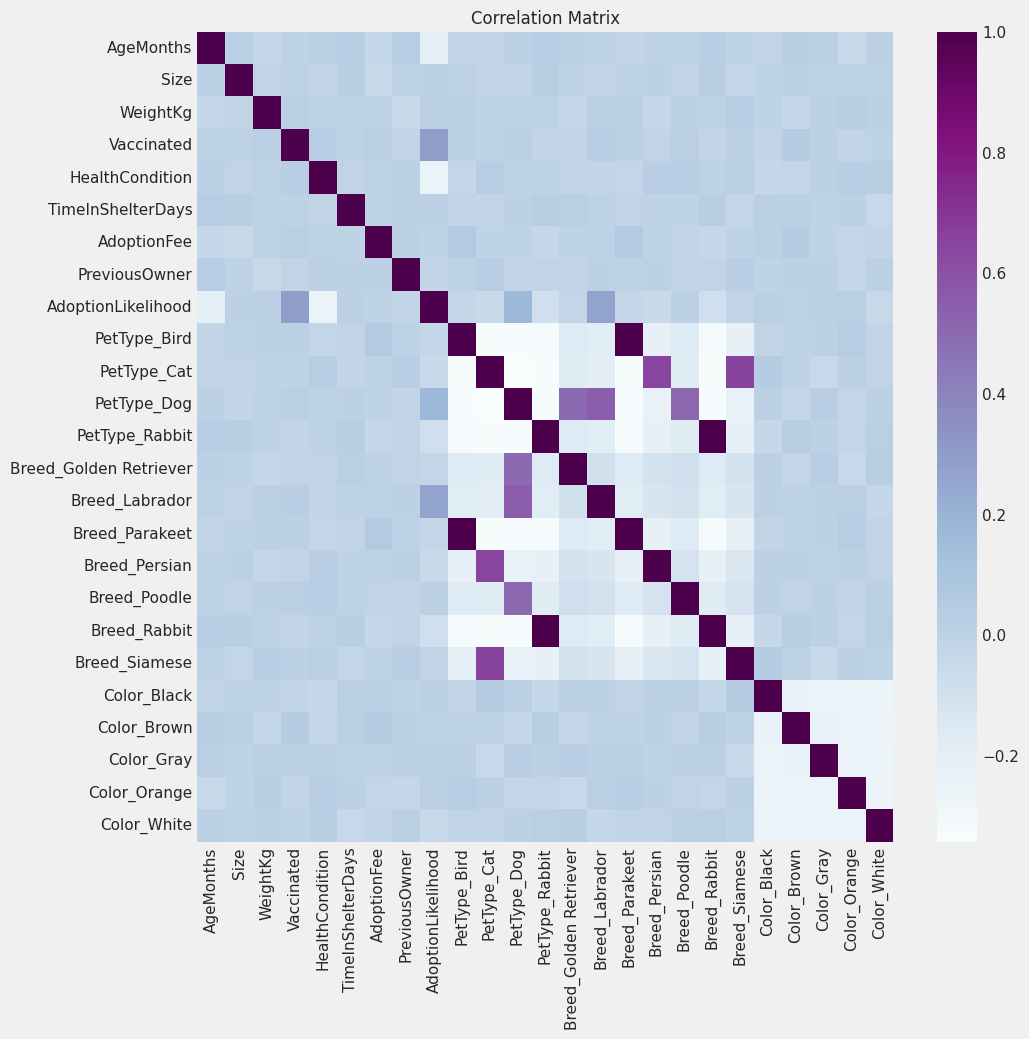

In [28]:
# correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=False,cmap='BuPu')
plt.title('Correlation Matrix', size=12)
plt.show()

In [29]:
# copy to df2
df2 = df.copy()

In [30]:
# splitting data
X = df2.drop('AdoptionLikelihood', axis=1)
y = df2['AdoptionLikelihood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# feature scaling use MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model 1

In [32]:
# model building
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_dim=(X_train.shape[1])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3200      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13569 (53.00 KB)
Trainable params: 13569 (53.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/100
161/161 [==============================] - 2s 5ms/step - loss: 0.5519 - accuracy: 0.7095 - val_loss: 0.5557 - val_accuracy: 0.7290
Epoch 2/100
161/161 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.7640 - val_loss: 0.5141 - val_accuracy: 0.7601
Epoch 3/100
161/161 [==============================] - 0s 3ms/step - loss: 0.4122 - accuracy: 0.8224 - val_loss: 0.4605 - val_accuracy: 0.8037
Epoch 4/100
161/161 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8754 - val_loss: 0.4235 - val_accuracy: 0.8162
Epoch 5/100
161/161 [==============================] - 0s 3ms/step - loss: 0.2780 - accuracy: 0.9073 - val_loss: 0.4436 - val_accuracy: 0.8162
Epoch 6/100
161/161 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.9143 - val_loss: 0.4066 - val_accuracy: 0.8660
Epoch 7/100
161/161 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.9260 - val_loss: 0.4185 - val_accuracy: 0.8536

In [34]:
# evaluate for data test
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 1.3627 - accuracy: 0.8607


[1.3627474308013916, 0.8606964945793152]

In [35]:
# evaluate for training test
model.evaluate(X_train, y_train)

51/51 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.9670


[0.27900680899620056, 0.9669781923294067]

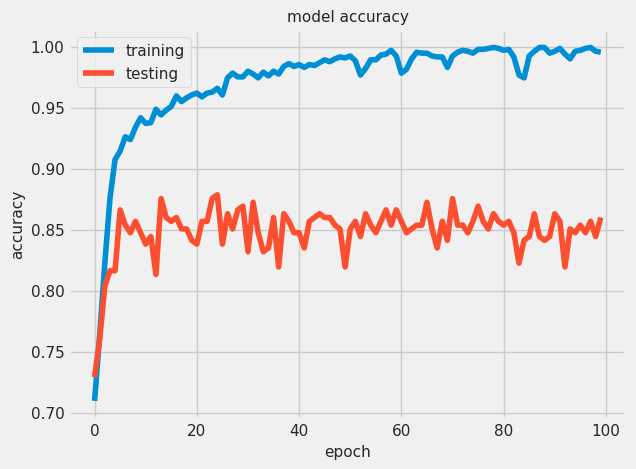

In [36]:
# plot history
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='testing')
plt.title('model accuracy', fontsize=11)
plt.ylabel('accuracy', fontsize=11)
plt.xlabel('epoch', fontsize=11)
plt.legend()
plt.show()

thats overfitting xD

## Model 2

In [42]:
# model2 building
model2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=(X_train.shape[1])),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

# define the optimizer
opt = Adam(learning_rate=0.0002)

# compile the model2
model2.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy'],
    )

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1600      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [43]:
# train the model
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
51/51 [==============================] - 2s 8ms/step - loss: 0.6956 - accuracy: 0.5047 - val_loss: 0.6698 - val_accuracy: 0.6418
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.6486 - val_loss: 0.6336 - val_accuracy: 0.6816
Epoch 3/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.6679 - val_loss: 0.6112 - val_accuracy: 0.6866
Epoch 4/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6173 - accuracy: 0.6804 - val_loss: 0.5945 - val_accuracy: 0.6965
Epoch 5/100
51/51 [==============================] - 0s 5ms/step - loss: 0.5998 - accuracy: 0.6910 - val_loss: 0.5820 - val_accuracy: 0.7189
Epoch 6/100
51/51 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.7047 - val_loss: 0.5714 - val_accuracy: 0.7239
Epoch 7/100
51/51 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.7184 - val_loss: 0.5587 - val_accuracy: 0.7289
Epoch 8/100
5

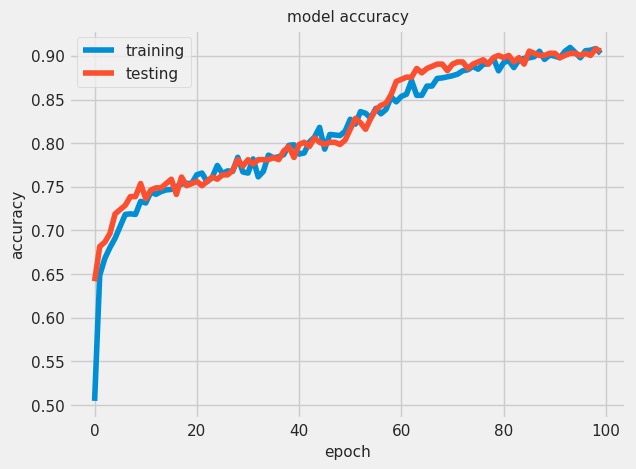

In [44]:
# plot history2
plt.plot(history2.history['accuracy'], label='training')
plt.plot(history2.history['val_accuracy'], label='testing')
plt.title('model accuracy', fontsize=11)
plt.ylabel('accuracy', fontsize=11)
plt.xlabel('epoch', fontsize=11)
plt.legend()
plt.show()

In [46]:
# evaluate for data test
model2.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.3108 - accuracy: 0.9055


[0.3107733130455017, 0.9054726362228394]

In [47]:
# evaluate for training test
model2.evaluate(X_train, y_train)

51/51 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.9302


[0.2325269728899002, 0.9302180409431458]

In [50]:
# do a predict and show 5 data
yp = model2.predict(X_test)

y_pred = []
for i in yp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:5]

13/13 [==============================] - 0s 7ms/step


[0, 0, 0, 1, 0]

In [48]:
y_test[:5]

927     0
294     0
713     0
252     1
1729    0
Name: AdoptionLikelihood, dtype: int64

From the 5 data that I took, it turns out that the predicted results are the same as the actual values

## Model Evaluation

In [65]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       271
           1       0.88      0.82      0.85       131

    accuracy                           0.91       402
   macro avg       0.90      0.88      0.89       402
weighted avg       0.90      0.91      0.90       402



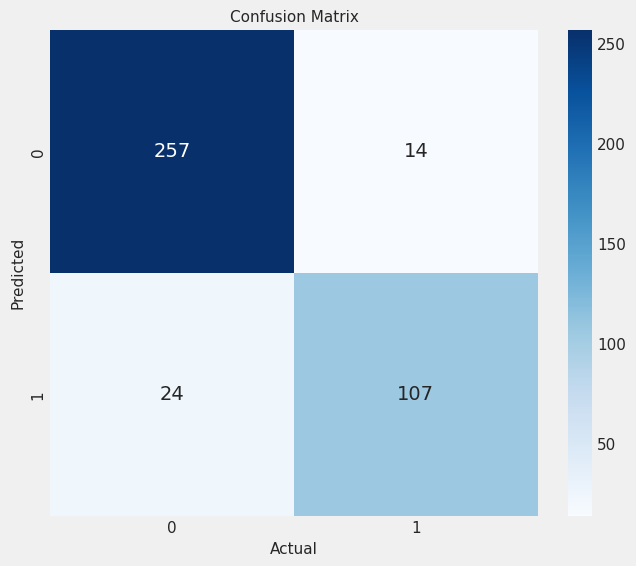

In [58]:
# confusion metrix heatmap
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Actual', fontsize=11)
plt.ylabel('Predicted', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

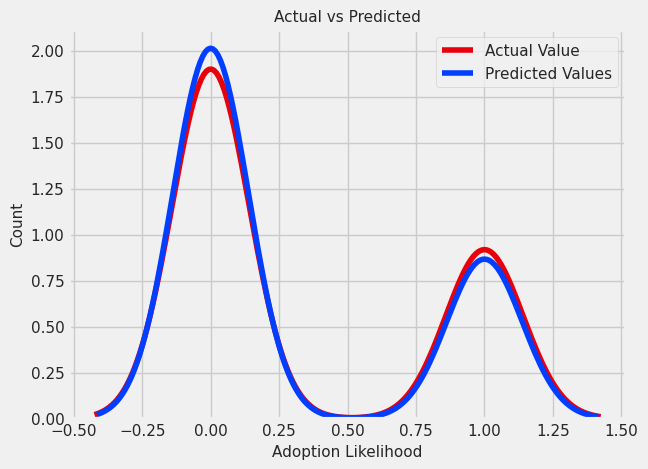

In [60]:
# distribution plot
ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Predicted Values' , ax=ax)
plt.title('Actual vs Predicted', fontsize=11)
plt.xlabel('Adoption Likelihood', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.legend()

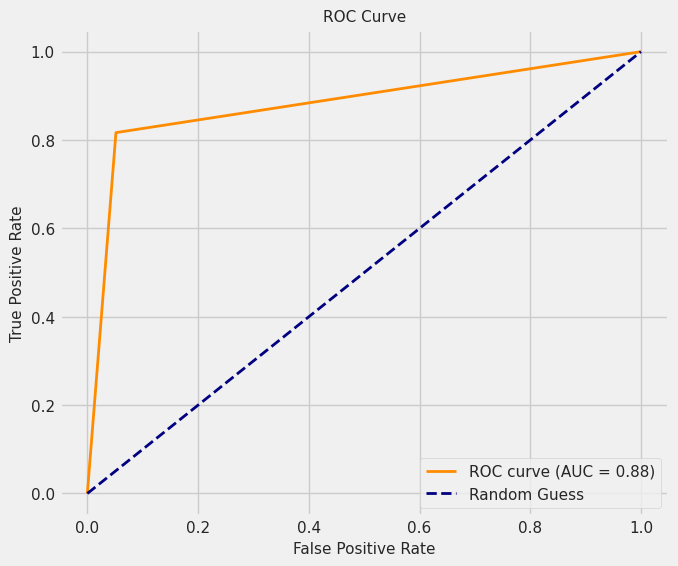

In [64]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.title('ROC Curve', fontsize=11)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Conclusion:

1. Based on the results of data analysis, it can be concluded that the most popular type of pet to adopt is dogs, followed by cats and rabbits.
2. Vaccinated pets are more likely to be adopted than unvaccinated pets.
3. Healthy pets are more likely to be adopted than pets with health conditions.
4. Low adoption fees can increase a pet's chances of being adopted.
5. The second model built using dropout had higher accuracy in predicting the likelihood of pet adoption than the first model that did not use dropout.
6. Based on the results of the report classification and confusion matrix, the second model has good performance in predicting the likelihood of pet adoption.
7. The ROC curve shows that the second model has a good ability to distinguish between adoptable and non-adoptable pets.

## Recommendation:

1. To increase pet adoption rates, animal shelters can focus on promoting less popular pets, such as rabbits and birds.
2. Animal shelters may also offer lower adoption fees for pets that are older or have health conditions.
3. Animal shelters can work with local veterinarians to provide vaccinations and other health care for the pets they shelter.
4. Animal shelters can use machine learning models to help predict the likelihood of pet adoption. This model can be used to target adoption efforts at the pets most likely to be adopted.